# Notebook 02
- Feature Engineering and Mind Map Hypothesis
- Filter attributes

# 0.0 Imports

In [30]:
import os
import math
import inflection
import datetime
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np

from dotenv               import load_dotenv
from IPython.core.display import HTML
from IPython.display      import Image
#from pandarallel          import pandarallel

In [31]:
import warnings
warnings.filterwarnings("ignore")

## 0.1 Helper Functions

In [32]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [33]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Data loading

In [34]:
# Loading variables 
load_dotenv()

True

In [35]:
# Caminho do arquivo a ser carregado
path_base = os.getenv("PATH_BASE")
path_data_save = 'data\\interim\\data_01.csv'
path_file_relative = os.path.join(path_base,path_data_save)

In [36]:
df_sales = pd.read_csv( path_file_relative, low_memory=False)

In [37]:
df_sales.head()

,Unnamed: 0,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,7,2015,0,Jul,0
1,1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,7,2015,0,Jul,0
4,4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,7,2015,0,Jul,0


In [38]:
df_sales = df_sales.drop('Unnamed: 0', axis=1)
df_sales.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,7,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,7,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,7,2015,0,Jul,0


In [39]:
df_sales.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month      int64
competition_open_since_year       int64
promo2                            int64
promo2_since_week                 int64
promo2_since_year                 int64
promo_interval                   object
month_map                        object
is_promo                          int64
dtype: object

In [40]:
df_sales['date'] = pd.to_datetime(df_sales['date'])

# 1.0 Feature Engineering

## 1.1 Mind Map Hypothesis

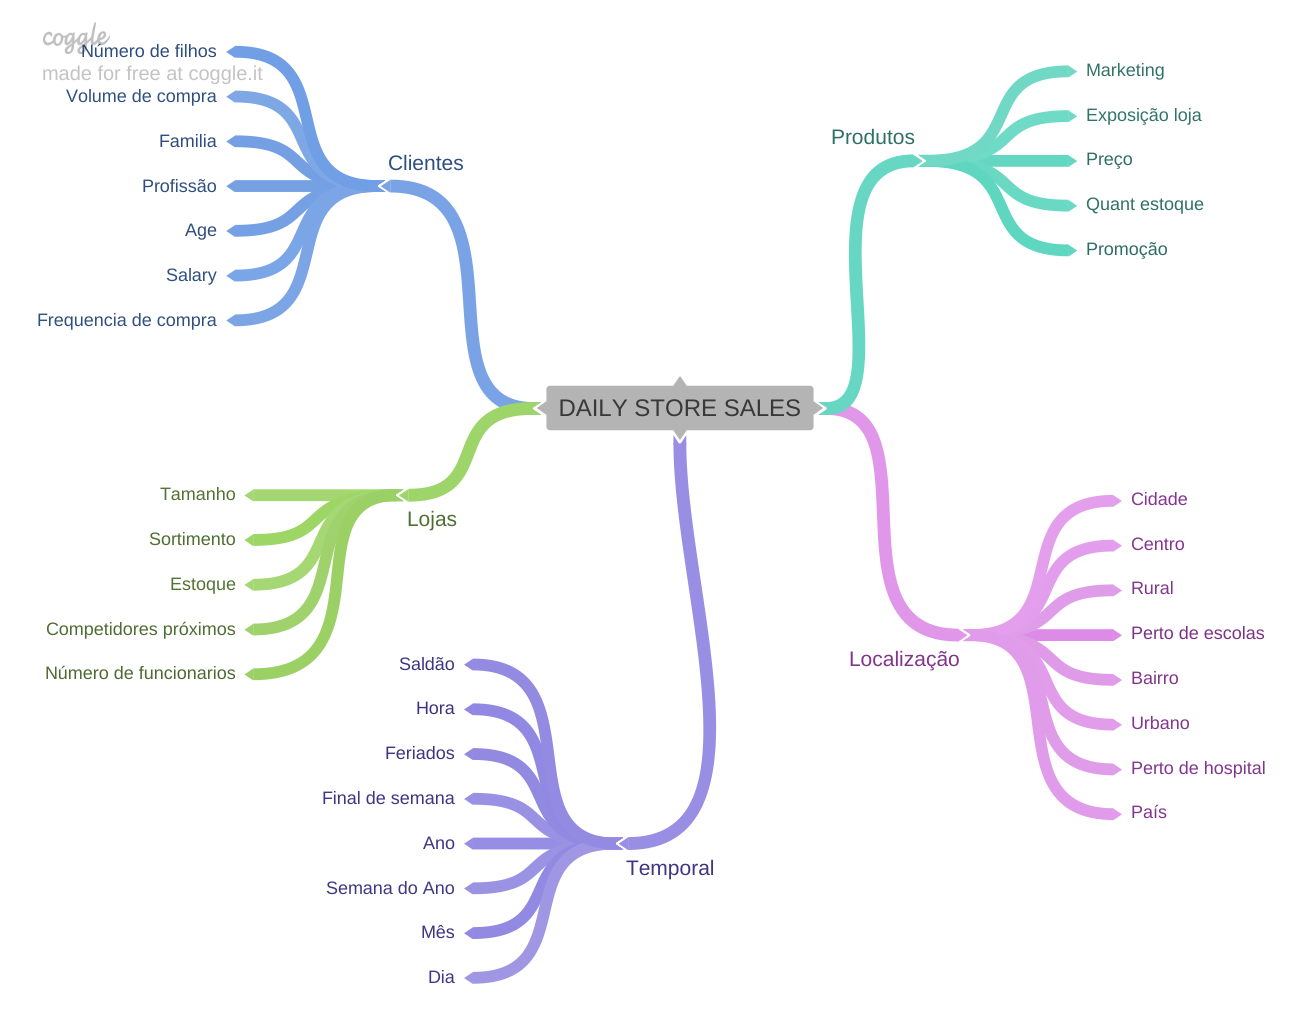

In [41]:
path_image = 'docs\\Images\\Hypothesis\\Mind_Map_Hypothesis.png'
path_image_relative = os.path.join(path_base,path_image)
Image(path_image_relative)

## 1.2 Create Hipothesis

**Hipóteses não são causa e efeitos!**

A priorização de Hipóteses se dá pela disponibilidade dos dados.

### 1.2.1 Lojas

**1.** Lojas com maior quadro de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com menor porte deveriam vender menos.

**5.** Lojas com maior sortimento deveriam vender mais.

**6.** Lojas com competidores mais próximos deveriam vender menos.

**7.** Lojas com competidores a mais tempo, deveriam vender mais.

### 1.2.2 Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição dos produtos nas vitrines deveriam vender mais.

**3.** Lojas que tem preços menores nos produtos deveriam vender mais.

**4.** Lojas com promoções mais agressivas (desconto maiores), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais promoções consecultivas deveriam vender mais

**7.** Lojas com mais dias de promoções deveriam vender mais.


### 1.2.3 Temporal

**1.** Lojas abertas durante o feriado do Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo trimestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

### 1.2.4 Localização
**Sem dados**

### 1.2.5 Clientes
**Sem dados**

### Lista de hipóteses

Lojas

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo, deveriam vender mais.

Produtos

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais promoções consecultivas deveriam vender mais

**6.** Lojas com mais dias de promoções deveriam vender mais.


Tempo

**7.** Lojas abertas durante o feriado do Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo trimestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## 1.3 Feature Engineering

In [42]:
df1 = df_sales.copy()

In [43]:
df1['promo2_since_year'].unique()

array([2015, 2010, 2011, 2012, 2009, 2014, 2013], dtype=int64)

In [44]:
#Year
df1['year'] = df1['date'].dt.year

#Month
df1['month'] = df1['date'].dt.month

#day
df1['day'] = df1['date'].dt.day

#week of year
df1['weekofyear'] = df1['date'].dt.weekofyear

# year week
df1['year_week'] = df1['date'].dt.strftime('%Y-%W')


#Competition Since (Composição do ano e do mês)
df1['competition_since']=df1.apply(lambda x: datetime.datetime(year= x['competition_open_since_year'], month= x['competition_open_since_month'], day=1), axis=1 ) #axis =1 pq estaremos usando mais de uma coluna
df1['competition_time_month'] = ((df1['date'] - df1['competition_since'])/30).apply(lambda x: x.days).astype(int)

#Promo Since
df1['promo_since'] = df1['promo2_since_year'].astype(str) + '-'+ df1['promo2_since_week'].astype(str)
df1['promo_since']=df1['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df1['promo_time_week']=((df1['date'] - df1['promo_since'])/7).apply(lambda x: x.days).astype(int)

#Assortment
dict_assortment = {'a':'basic' , 'b':'extra', 'c':'extended'}
df1['assortment'] = df1['assortment'].map(dict_assortment)

#State Holiday
dict_holiday = {'a':'public_holiday', 'b':'Easter_holiday', 'c':'Christmas', '0':'Regular_day'}
df1['state_holiday'] = df1['state_holiday'].map(dict_holiday)

# 2.0 Filtering variables

In [45]:
df2 = df1.copy()

In [46]:
df2.head(3).T

,0,1,2
store,1,2,3
day_of_week,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314
customers,555,625,821
open,1,1,1
promo,1,1,1
state_holiday,Regular_day,Regular_day,Regular_day
school_holiday,1,1,1
store_type,c,a,a


In [47]:
df2['open'].unique()

array([1, 0], dtype=int64)

**RESTRIÇÕES DO NEGÓCIO:**
- Customers: Essa variável não vai está disponível para o modelo em produção (Pode ser retirado o atributo)
- Open: Não interesse em predizer a venda para lojas fechadas já que não faz sentido. Logo, deveremos filtrar essas linhas que tem open igual a 0. (Linhas a serem retiradas)
- Month Map: Apenas uma coluna auxiliar, logo pode ser retirada
- promo_interval:  Apenas uma coluna auxiliar, logo pode ser retirada
- Sales: Retirar as linhas em que as vendas foram iguais a zero. (Linhas a serem retiradas)

## 2.1 Filtragem das linhas

In [48]:
df2 = df2[df2['open'] != 0]

## 2.2 Filtragem das colunas

In [49]:
cols_drop = ['customers' , 'month_map', 'promo_interval']
df2 = df2.drop(cols_drop , axis=1)

In [50]:
df2.columns

Index(['store', 'day_of_week', 'date', 'sales', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'is_promo', 'year', 'month', 'day', 'weekofyear',
       'year_week', 'competition_since', 'competition_time_month',
       'promo_since', 'promo_time_week'],
      dtype='object')

# 3.0 Save Data

In [51]:
path_data = os.path.join(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('.'))),'data'),'interim')
file_data = 'data_02.csv'
df2.to_csv(os.path.join(path_data,file_data))